In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import MarkerCluster
import math

In [3]:
hdb_df = pd.read_csv('data/hdb_combined_clean.csv', low_memory=False)

In [4]:
hdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917393 entries, 0 to 917392
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   month_of_sale                 917393 non-null  object 
 1   town                          917393 non-null  object 
 2   flat_type                     917393 non-null  object 
 3   block                         917393 non-null  object 
 4   street_name                   917393 non-null  object 
 5   storey_range                  917393 non-null  object 
 6   floor_area_sqm                917393 non-null  float64
 7   flat_model                    917393 non-null  object 
 8   lease_commence_date           917393 non-null  int64  
 9   resale_price                  917393 non-null  float64
 10  address                       917393 non-null  object 
 11  latitude                      917393 non-null  float64
 12  longitude                     917393 non-nul

In [5]:
hdb_df.head()

month_of_sale        town flat_type block       street_name storey_range  \
0       1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1       1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2       1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3       1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4       1990-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  ...  \
0            31.0        Improved                 1977        9000.0  ...   
1            31.0        Improved                 1977        6000.0  ...   
2            31.0        Improved                 1977        8000.0  ...   
3            31.0        Improved                 1977        6000.0  ...   
4            73.0  New Generation                 1976       47200.0  ...   

    longitude  nearest_supermarket_distance  nearest_school_distance  \
0  103.841624                      0.000000               104.434561   
1  103.841624                      0.000000               104.434561   
2  103.841624                      0.000000               104.434561   
3  103.841624                      0.000000               104.434561   
4  103.841505                     42.113407               145.364227   

   nearest_mrt_distance  nearest_hawkers_distance  cbd_distance  year_of_sale  \
0            781.530960                  0.000000   8765.007560          1990   
1            781.530960                  0.000000   8765.007560          1990   
2            781.530960                  0.000000   8765.007560          1990   
3            781.530960                  0.000000   8765.007560          1990   
4            800.632183                 42.113407   8727.095898          1990   

   calculated_remaining_lease  storey_median  price_per_sqm  
0                        86.0             11     290.322581  
1                        86.0              5     193.548387  
2                        86.0             11     258.064516  
3                        86.0              8     193.548387  
4                        85.0              5     646.575342  

[5 rows x 22 columns]

In [6]:
hdb_df.describe()

floor_area_sqm  lease_commence_date  resale_price       latitude  \
count   917393.000000        917393.000000  9.173930e+05  917393.000000   
mean        95.719042          1988.195962  3.185476e+05       1.361789   
std         25.837446            10.573612  1.684311e+05       0.041717   
min         28.000000          1966.000000  5.000000e+03       1.241470   
25%         73.000000          1981.000000  1.920000e+05       1.333870   
50%         93.000000          1986.000000  2.950000e+05       1.355064   
75%        113.000000          1996.000000  4.150000e+05       1.382477   
max        307.000000          2022.000000  1.568888e+06       1.457071   

           longitude  nearest_supermarket_distance  nearest_school_distance  \
count  917393.000000                 917393.000000            917393.000000   
mean      103.839397                    293.703915               338.415083   
std         0.073615                    158.073309               212.671224   
min       103.685228                      0.000000                42.554861   
25%       103.773300                    183.502982               199.366377   
50%       103.843413                    275.946398               291.026302   
75%       103.897971                    382.936670               424.723420   
max       103.987805                   4470.303250              5144.585152   

       nearest_mrt_distance  nearest_hawkers_distance   cbd_distance  \
count         917393.000000             917393.000000  917393.000000   
mean             781.202060               1433.548434   11735.966435   
std              419.825561               1343.301593    4384.424887   
min                0.000000                  0.000000     721.958596   
25%              471.671649                401.847599    8707.240155   
50%              711.296603                942.904594   12429.766591   
75%             1013.899247               2061.808095   15118.805744   
max             5466.706999               7505.538603   22074.073156   

        year_of_sale  calculated_remaining_lease  storey_median  price_per_sqm  
count  917393.000000               917393.000000  917393.000000  917393.000000  
mean     2006.021874                   81.174088       7.681839    3292.300689  
std         9.213166                   10.641616       4.812299    1506.435187  
min      1990.000000                   41.000000       2.000000     161.290323  
25%      1999.000000                   74.000000       5.000000    2287.313433  
50%      2005.000000                   83.000000       8.000000    2941.176471  
75%      2013.000000                   90.000000      11.000000    4166.666667  
max      2024.000000                   99.000000      50.000000   15170.838710

It is notable that the price ranges from 5x10^3 to 1.5x10^6

## Correlation between numerical variables and resale price


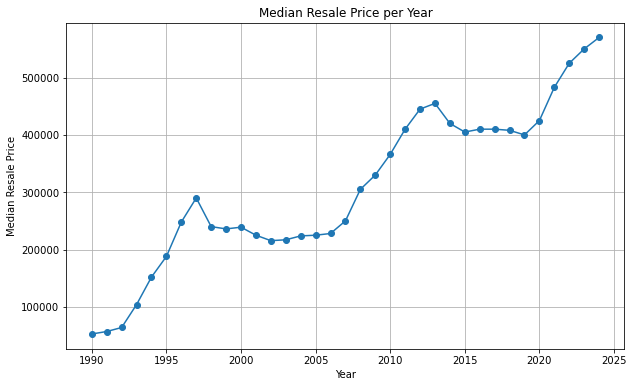

In [7]:
# Group by 'year' and calculate the median resale price
median_resale_price_per_year = hdb_df.groupby('year_of_sale')['resale_price'].median().reset_index()

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(median_resale_price_per_year['year_of_sale'], median_resale_price_per_year['resale_price'], marker='o')
plt.title('Median Resale Price per Year')
plt.xlabel('Year')
plt.ylabel('Median Resale Price')
plt.grid(True)
plt.show()


In [8]:
import plotly.express as px
import pandas as pd

# Group by 'year' and 'town' and calculate the median resale price
median_resale_price_per_year_town = hdb_df.groupby(['year_of_sale', 'town'])['resale_price'].median().reset_index()

# Calculate the overall median resale price per town (across all years)
overall_median_per_town = median_resale_price_per_year_town.groupby('town')['resale_price'].median().reset_index()

# Sort towns by the overall median resale price in descending order
sorted_towns = overall_median_per_town.sort_values('resale_price', ascending=False)['town']

# Reorder the 'town' column in the original dataframe based on the sorted towns
median_resale_price_per_year_town['town'] = pd.Categorical(
    median_resale_price_per_year_town['town'], categories=sorted_towns, ordered=True
)

# Plotting using Plotly, with towns sorted by median resale price
fig = px.line(
    median_resale_price_per_year_town, 
    x='year_of_sale', 
    y='resale_price', 
    color='town', 
    title='Median Resale Price per Year by Town (Sorted by Overall Median Price)',
    labels={'resale_price': 'Median Resale Price', 'year_of_sale': 'Year', 'town': 'Town'},
    hover_name='town',  # Show town name when hovering
    markers=True        # Add markers to the lines
)

# Update the layout for better readability
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Median Resale Price',
    legend_title='Town',
    hovermode='x unified',  # Display hover information for all traces at the same x-value
    width=900,  # Adjust width
    height=600  # Adjust height
)

# Display the plot
fig.show()


higher in bukit timah, pasir ris

In [13]:
corr_df = hdb_df[['resale_price', 'floor_area_sqm', 'storey_median', 'nearest_supermarket_distance',
                 'nearest_school_distance', 'nearest_mrt_distance', 'nearest_hawkers_distance', 'cbd_distance',
                  'calculated_remaining_lease']]

In [11]:
corr_df.drop_duplicates()

resale_price  floor_area_sqm  storey_median  \
0             9000.0        3.433987       2.397895   
1             6000.0        3.433987       1.609438   
2             8000.0        3.433987       2.397895   
3             6000.0        3.433987       2.079442   
4            47200.0        4.290459       1.609438   
...              ...             ...            ...   
917388      860000.0        4.983607       1.609438   
917389      820000.0        4.955827       1.609438   
917390      795000.0        4.955827       2.397895   
917391      935000.0        4.983607       2.079442   
917392      998000.0        5.099866       1.609438   

        nearest_supermarket_distance  nearest_school_distance  \
0                           0.000000               104.434561   
1                           0.000000               104.434561   
2                           0.000000               104.434561   
3                           0.000000               104.434561   
4                          42.113407               145.364227   
...                              ...                      ...   
917388                     96.194255               342.194936   
917389                    325.017271               245.688741   
917390                    495.566705               261.887570   
917391                    321.059049               536.099609   
917392                    139.268019               221.649810   

        nearest_mrt_distance  nearest_hawkers_distance  cbd_distance  \
0                 781.530960                  0.000000   8765.007560   
1                 781.530960                  0.000000   8765.007560   
2                 781.530960                  0.000000   8765.007560   
3                 781.530960                  0.000000   8765.007560   
4                 800.632183                 42.113407   8727.095898   
...                      ...                       ...           ...   
917388            794.968853               1585.381470  15659.416537   
917389           1365.949400               2146.216843  15664.747929   
917390            573.468277               1466.961134  14848.699486   
917391            403.882660               2069.561982  14060.706338   
917392            863.123973               1974.593024  14544.001236   

        calculated_remaining_lease  
0                             86.0  
1                             86.0  
2                             86.0  
3                             86.0  
4                             85.0  
...                            ...  
917388                        63.0  
917389                        63.0  
917390                        62.0  
917391                        62.0  
917392                        62.0  

[906756 rows x 9 columns]


Correlation Matrix:


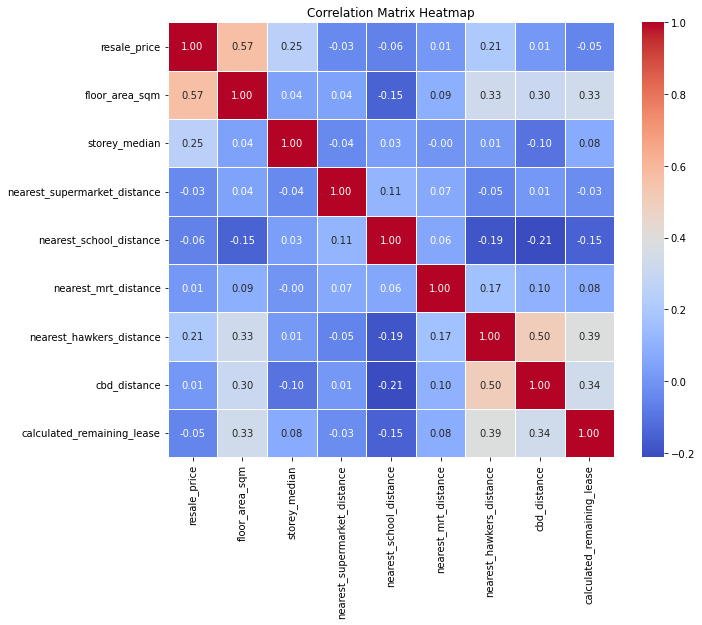

In [14]:
correlation_matrix = corr_df.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

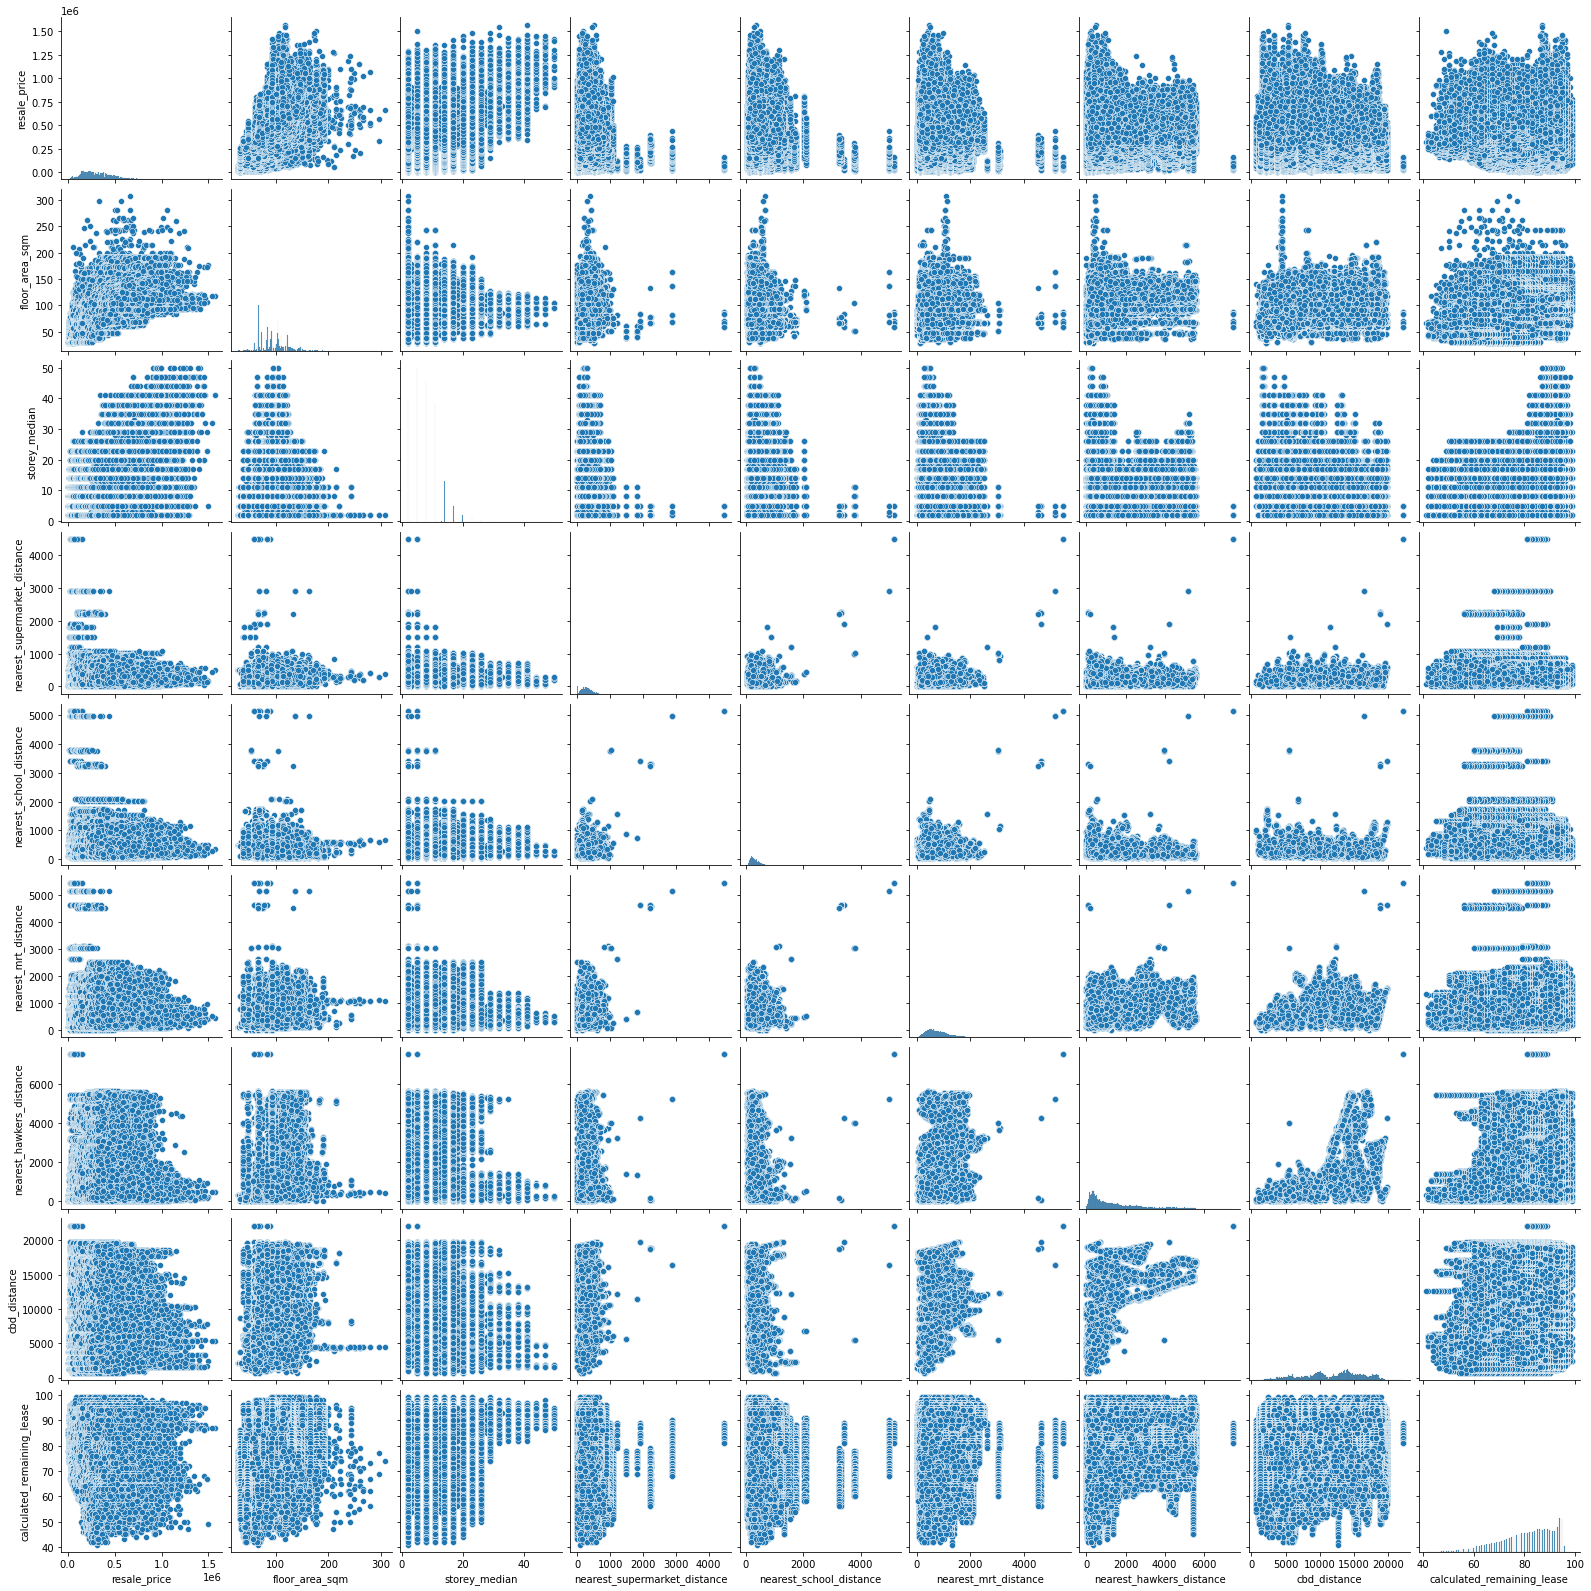

In [15]:
sns.pairplot(corr_df)

ValueError: num must be 1 <= num <= 9, not 10

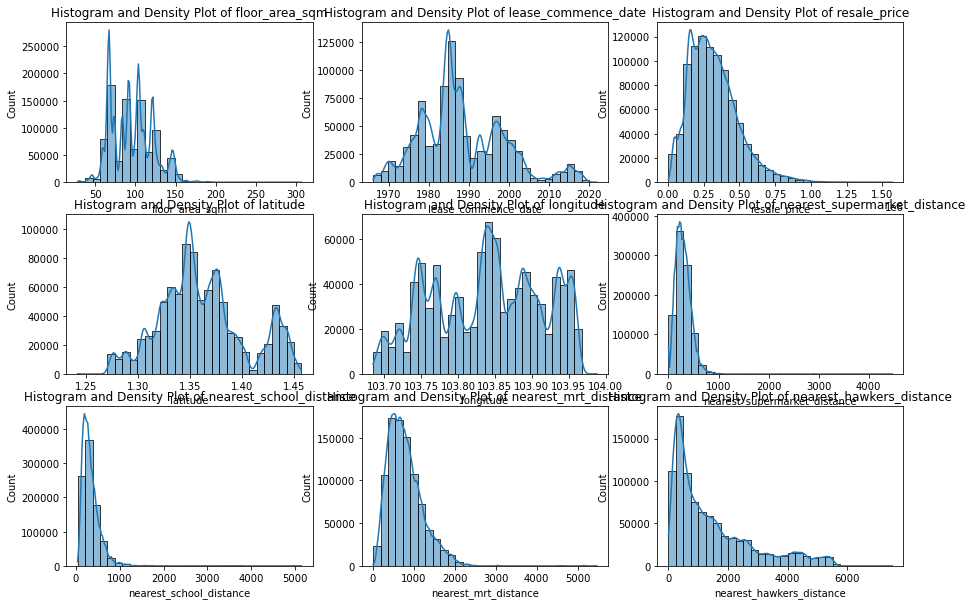

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, shapiro


# Select numerical columns
numerical_cols = hdb_df.select_dtypes(include=[np.number]).columns

# Plot histograms and box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(hdb_df[col], bins=30, kde=True)
    plt.title(f'Histogram and Density Plot of {col}')
plt.tight_layout()
plt.show()

# Calculate skewness
skewness = hdb_df[numerical_cols].skew()
print("Skewness for numerical columns:\n", skewness)

# Perform Shapiro-Wilk test
for col in numerical_cols:
    stat, p = shapiro(hdb_df[col].dropna())
    print(f'Shapiro-Wilk Test for {col}: Statistic={stat}, p-value={p}')


In [ ]:
hdb_df['flat_model'].unique()

In [ ]:
hdb_df.info()

In [ ]:
# Compute the correlation
correlation = hdb_df.corr().loc['floor_area_sqm', 'resale_price']
print(f"Correlation between X and Y: {correlation}")

# Plot the data
plt.scatter(hdb_df['floor_area_sqm'], hdb_df['resale_price'])
plt.title("Scatter Plot of X and Y")
plt.xlabel("floor_area_sqm")
plt.ylabel("resale_price")
plt.show()


## Correlation between categorcal variables and resale price

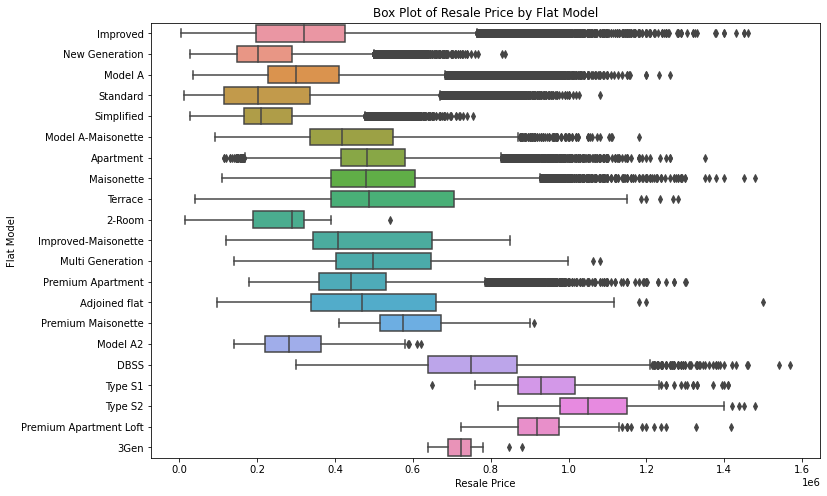

In [13]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='resale_price', y='flat_model', data=hdb_df)

plt.title('Box Plot of Resale Price by Flat Model')
plt.xlabel('Resale Price')
plt.ylabel('Flat Model')

plt.show()

median of type s2, type s1, premium apartment lofts are on the higher end

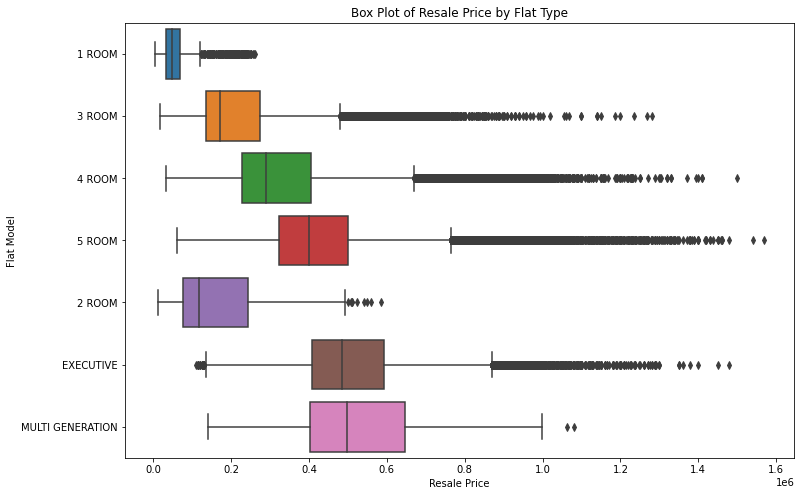

In [14]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='resale_price', y='flat_type', data=hdb_df)

plt.title('Box Plot of Resale Price by Flat Type')
plt.xlabel('Resale Price')
plt.ylabel('Flat Model')

plt.show()


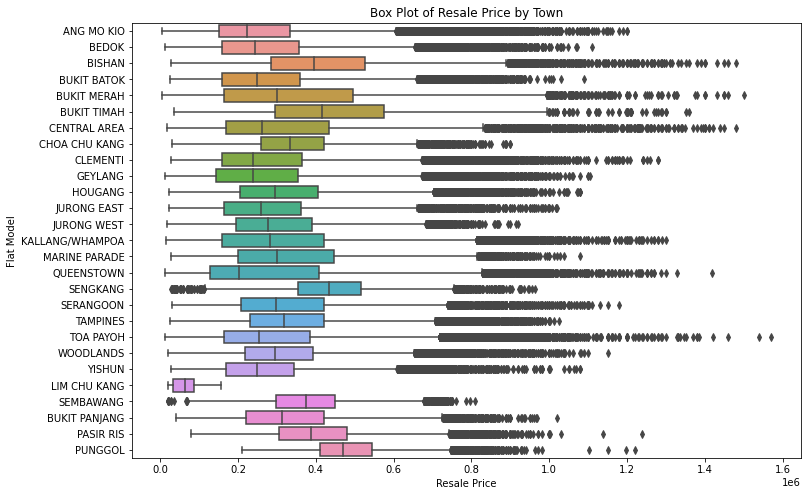

In [15]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='resale_price', y='town', data=hdb_df)

plt.title('Box Plot of Resale Price by Town')
plt.xlabel('Resale Price')
plt.ylabel('Flat Model')

plt.show()


Punggol, Sengkang, Bukit Timah has a higher median resale price compared to other areas.  

In [16]:
hdb_df.head()

month_of_sale        town flat_type block       street_name storey_range  \
0       1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1       1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2       1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3       1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4       1990-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  ...  \
0            31.0        Improved                 1977        9000.0  ...   
1            31.0        Improved                 1977        6000.0  ...   
2            31.0        Improved                 1977        8000.0  ...   
3            31.0        Improved                 1977        6000.0  ...   
4            73.0  New Generation                 1976       47200.0  ...   

    longitude  nearest_supermarket_distance  nearest_school_distance  \
0  103.841624                      0.000000               104.434561   
1  103.841624                      0.000000               104.434561   
2  103.841624                      0.000000               104.434561   
3  103.841624                      0.000000               104.434561   
4  103.841505                     42.113407               145.364227   

   nearest_mrt_distance  nearest_hawkers_distance  cbd_distance  year_of_sale  \
0            781.530960                  0.000000   8765.007560          1990   
1            781.530960                  0.000000   8765.007560          1990   
2            781.530960                  0.000000   8765.007560          1990   
3            781.530960                  0.000000   8765.007560          1990   
4            800.632183                 42.113407   8727.095898          1990   

   calculated_remaining_lease  storey_median  price_per_sqm  
0                        86.0             11     290.322581  
1                        86.0              5     193.548387  
2                        86.0             11     258.064516  
3                        86.0              8     193.548387  
4                        85.0              5     646.575342  

[5 rows x 22 columns]

In [ ]:
# marking the dataset number
conditions = [
    (hdb_df['year_of_sale'] >= 1990) & (hdb_df['year_of_sale'] <= 1999),
    (hdb_df['year_of_sale'] >= 2000) & (hdb_df['year_of_sale'] <= 2012),
    (hdb_df['year_of_sale'] >= 2013) & (hdb_df['year_of_sale'] <= 2014),
    (hdb_df['year_of_sale'] >= 2015) & (hdb_df['year_of_sale'] <= 2016),
    (hdb_df['year_of_sale'] >= 2017)
]
labels = [1, 2, 3, 4, 5]

hdb_df['source_dataset'] = np.select(conditions, labels, default=np.nan)

In [ ]:
hdb_df['source_dataset'].value_counts()

In [ ]:
# Create a 2x3 grid for displaying plots (2 plots per row)
fig, axes = plt.subplots(3, 2, figsize=(14, 12))  # 3 rows, 2 columns
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through the 5 source datasets
for i in range(1, 6):
    hdb_df_subset = hdb_df[hdb_df['source_dataset'] == i]  # Filter for specific source dataset
    
    # Compute the correlation between floor_area_sqm and price/m2
    correlation = hdb_df_subset.corr().loc['floor_area_sqm', 'resale_price']
    
    # Plot the scatter plot on the corresponding subplot
    axes[i-1].scatter(hdb_df_subset['floor_area_sqm'], hdb_df_subset['resale_price'])
    axes[i-1].set_title(f"Source Dataset {i} (Corr: {correlation:.2f})")
    axes[i-1].set_xlabel("Floor Area (sqm)")
    axes[i-1].set_ylabel("Resale Price")

# Remove the last empty subplot (since we have 5 datasets but 6 subplots)
fig.delaxes(axes[-1])

# Adjust the layout so the plots don't overlap
plt.tight_layout()
plt.show()


3 and 4 got lesser outliers

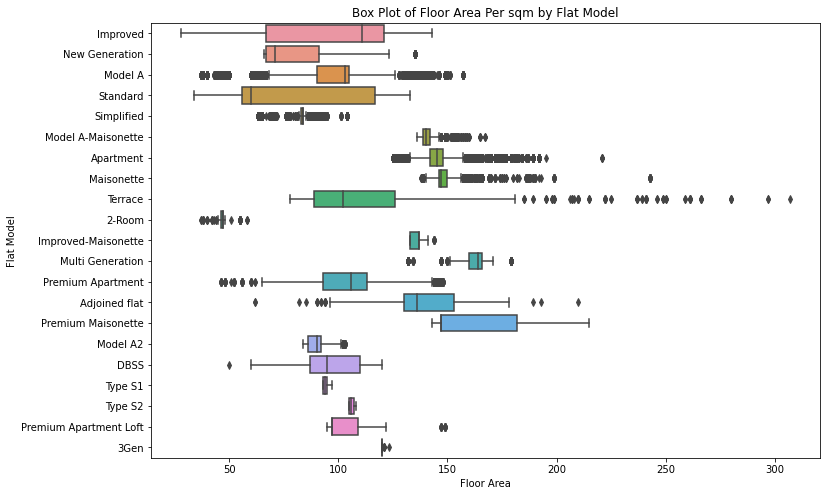

In [19]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='floor_area_sqm', y='flat_model', data=hdb_df)

plt.title('Box Plot of Floor Area Per sqm by Flat Model')
plt.xlabel('Floor Area')
plt.ylabel('Flat Model')

plt.show()

In [15]:
# Convert categorical columns to numerical
categorical_cols = ['town', 'flat_model', 'flat_type']  # Replace with relevant column names
df_encoded = pd.get_dummies(hdb_df, columns=categorical_cols, drop_first=True)

In [16]:
df_encoded.drop(['month_of_sale', 'block', 'street_name', 'storey_range', 'lease_commence_date', 'address',
             'latitude', 'longitude','price_per_sqm'],
            axis=1, inplace=True)

In [17]:
df_encoded = df_encoded.drop_duplicates()

In [18]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906790 entries, 0 to 917392
Data columns (total 62 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   floor_area_sqm                     906790 non-null  float64
 1   resale_price                       906790 non-null  float64
 2   nearest_supermarket_distance       906790 non-null  float64
 3   nearest_school_distance            906790 non-null  float64
 4   nearest_mrt_distance               906790 non-null  float64
 5   nearest_hawkers_distance           906790 non-null  float64
 6   cbd_distance                       906790 non-null  float64
 7   year_of_sale                       906790 non-null  int64  
 8   calculated_remaining_lease         906790 non-null  float64
 9   storey_median                      906790 non-null  int64  
 10  town_BEDOK                         906790 non-null  uint8  
 11  town_BISHAN                        9067